**Business Understanding**

Here we are going to answer the following three business questions specific to developers in USA

- Which Programming Languages are the most Popular in the USA?
- Which programming language is the most popular among young developers?
- What programming language do developers who earn top 5 average Salaries use?

Answering the above business questions helps those new the field to make a better choice on which programming language to learn based on popularity and how much they can earn if they learn a particular programming language.

### Data Understanding
**Step 1: A look at  all the data**

Data we are using for this analysis is Stack Overflow Annual Developer Survey Data

More than 100K responses fielded from 183 countries and dependent territoris. Many thanks to [Stack Overflow](https://insights.stackoverflow.com/survey) for making this data publicly available. However, I have selected developers in USA to answer the business questions stipulated above.

before diving into answering the above questions, let's have a look at the data.

In [23]:
#import packages
import pandas as pd
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# read all the data
survey_df = pd.read_csv('data/survey_results_public.csv', low_memory=False)
survey_df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [41]:
# read the schema associated to the data
survey_schema = pd.read_csv('data/survey_results_schema.csv')
survey_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."


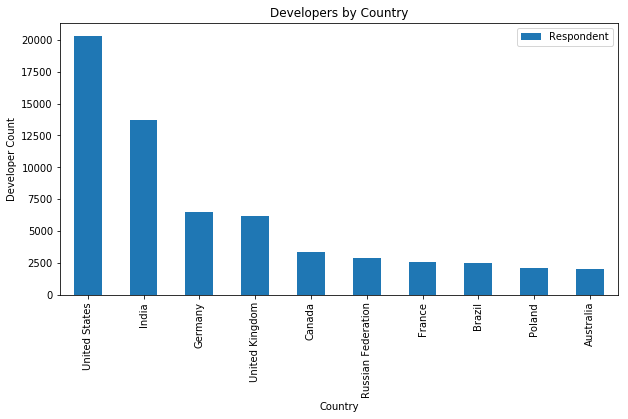

In [26]:
# developers per country
dev_per_country  = survey_df[['Country', 'Respondent']].groupby('Country').count().sort_values(by='Respondent', ascending=False)
dev_per_country.iloc[:10,:].plot(kind='bar', figsize=(10,5))
plt.title('Developers by Country')
plt.xlabel('Country')
plt.ylabel('Developer Count');

The above data shows the highest number of developers who responded to the survey reside in USA. Our business questions also focus on those developers only. I have left the analysis comparing the result with other countries to you the reader.

**Step 2: A look at the US developers data**

In [27]:
# How much percent of the total developers currently reside in the USA?
us_survey = survey_df[survey_df.Country=='United States']
print('{0:.2f}% developers  are in the USA'.format(100*us_survey.shape[0]/survey_df.shape[0]))

20.54% developers  are in the USA


As shown int the cell below we are going to use the column **LanguageWorkedWith** and **Salary** to aswner our business questions.

In [54]:
list(survey_schema[survey_schema['Column']=='LanguageWorkedWith'].QuestionText)

['Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)']

In [55]:
list(survey_schema[survey_schema['Column']=='Salary'].QuestionText)

['What is your current gross salary (before taxes and deductions), in ${q://QID50/ChoiceGroup/SelectedChoicesTextEntry}? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.']

In [28]:
print("{0:.2f}% responders didn't specify the Language they worked with".
      format(100*us_survey.LanguageWorkedWith.isnull().sum()/us_survey.shape[0]))

12.88% responders didn't specify the Language they worked with


In [56]:
print("{0:.2f}% responders haven't disclosed Salary".
      format(100*us_survey.Salary.isnull().sum()/us_survey.shape[0]))

35.54% responders have specified 0 Salary


We can see above that LanguageWorkedWith and Salary fields are null but those won't have any impact in this analysis as I have only considered those who have specified thos entries as shown in below analysis.

### Answering Business quesions
**1. What are the top most programming languages developers worked with?**

To answer this question we need LanguageWorkedWith column, find all the possible programming languages included in the survey and count each of them to find the total.

**1.1-Data Preparation**

In [57]:
lang_df = us_survey.LanguageWorkedWith.value_counts().reset_index()
lang_df.rename(columns={'index':'Language', 'LanguageWorkedWith':'count'}, inplace=True)
lang_df.head()

,Language,count
0,C#;JavaScript;SQL;HTML;CSS,364
1,C#;JavaScript;SQL;TypeScript;HTML;CSS,206
2,JavaScript;HTML;CSS,194
3,JavaScript;PHP;SQL;HTML;CSS;Bash/Shell,179
4,JavaScript;PHP;SQL;HTML;CSS,142


In [74]:
all_values = us_survey.LanguageWorkedWith.values
expanded_values = []
for x in all_values:  
    expanded_values.extend(str(x).split(';'))
lang_list = set(expanded_values)
print(len(lang_list))
print(lang_list)

39
{'CSS', 'Objective-C', 'Visual Basic 6', 'Go', 'Groovy', 'Bash/Shell', 'Haskell', 'Ruby', 'Python', 'CoffeeScript', 'Lua', 'VBA', 'C', 'Perl', 'C++', 'JavaScript', 'Hack', 'Ocaml', 'Erlang', 'Clojure', 'Scala', 'Delphi/Object Pascal', 'Java', 'SQL', 'Kotlin', 'Cobol', 'VB.NET', 'Swift', 'PHP', 'Julia', 'TypeScript', 'nan', 'R', 'Assembly', 'Matlab', 'C#', 'Rust', 'HTML', 'F#'}


In [75]:
#Now we want to see how often each of these individual values appears - I wrote 
# this function to assist with process - it isn't the best solution, but it gets
# the job done and our dataset isn't large enough to computationally hurt us too much.
# Thanks to https://github.com/jjrunner/ for the following function
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up 
    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])   
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [76]:
lang_df_sep_count = total_count(lang_df, 'Language', 'count', lang_list)
lang_df_sep_count.head()

,Language,count
12,C,15374
22,Java,14792
15,JavaScript,13126
36,HTML,12479
0,CSS,11979


In [77]:
lang_df_sep_count['perc'] = 100*lang_df_sep_count['count']/np.sum(lang_df_sep_count['count'])
lang_df_sep_count.head()

,Language,count,perc
12,C,15374,11.158611
22,Java,14792,10.736190
15,JavaScript,13126,9.526989
36,HTML,12479,9.057390
0,CSS,11979,8.694485


**1.2. Answer to our first business question**

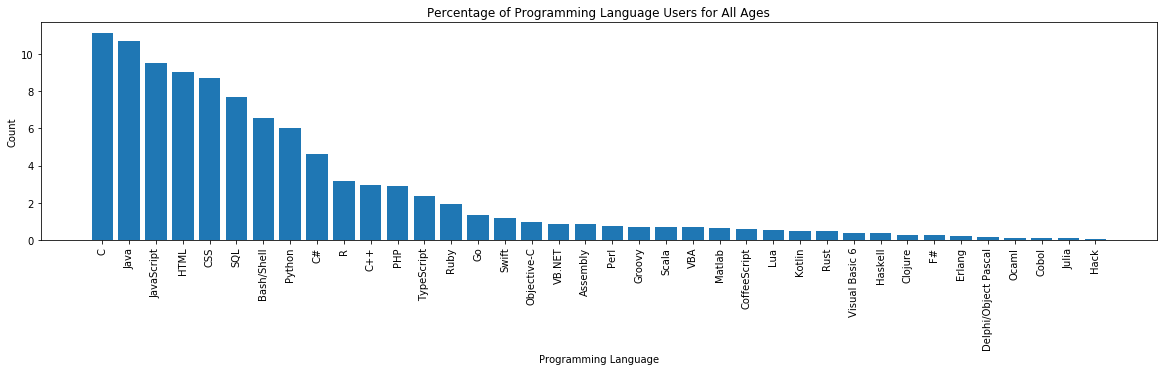

In [78]:
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)
x = np.arange(1,39)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.bar(x, lang_df_sep_count.perc)
x_tick_labels = lang_df_sep_count.Language
plt.title('Percentage of Programming Language Users for All Ages');
plt.xlabel('Programming Language');
plt.ylabel('Count');
ax.set_xticklabels(x_tick_labels, rotation='vertical', fontsize=10);

The above graph shows the top programming languages developers worked with are C, Java, JavaScript, HTML and CSS. Actual numbers show C and Java are pretty close. Not surprisingly, users of HTML and JavaScipt are very close since there is a high chance to use JavaScript for developering working with HTML and CSS. Now let's look at how usage varies by age.

**2. Which programming language is the most popular among young developers**

Here we'll look at programming language that are poppular among 18-24 years old age range.

**2.1 Data preparation**

Here we are going to create a new entry for each programming language

In [79]:
#df_lang = survey_df[['Respondent', 'Age', 'LanguageWorkedWith']]
df_lang_exp = pd.concat([survey_df.Respondent, survey_df.Age, survey_df.LanguageWorkedWith.str.split(';')], axis=1).dropna()

In [80]:
df_stacked = pd.DataFrame({'Respondent':np.repeat(df_lang_exp.Respondent.values, 
                                                    df_lang_exp.LanguageWorkedWith.str.len()),
                             'Age':np.repeat(df_lang_exp.Age.values, 
                                                    df_lang_exp.LanguageWorkedWith.str.len()),
                        'LanguageWorkedWith':np.concatenate(df_lang_exp.LanguageWorkedWith.values)
                            })
df_stacked.head()

,Respondent,Age,LanguageWorkedWith
0,1,25 - 34 years old,JavaScript
1,1,25 - 34 years old,Python
2,1,25 - 34 years old,HTML
3,1,25 - 34 years old,CSS
4,3,35 - 44 years old,JavaScript


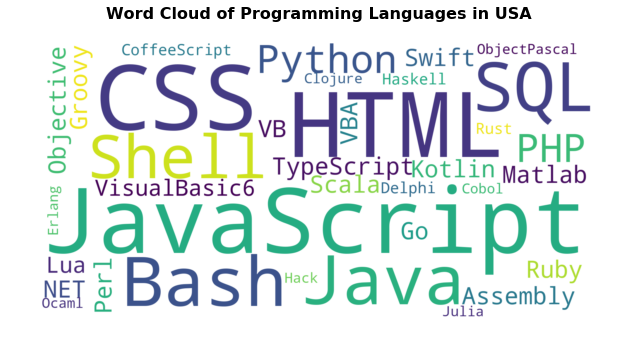

In [81]:
from wordcloud import WordCloud

lang = df_stacked["LanguageWorkedWith"].value_counts().reset_index()
wrds = lang["index"].str.replace(" ","")
wc = WordCloud(background_color='white', colormap=plt.cm.viridis, scale=5).generate(" ".join(wrds))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Programming Languages in USA\n",
          fontdict={'size':16, 'weight': 'bold'});

In [82]:
df_stacked['Age_lang_Count'] =1  
groupby_age_language  = df_stacked.groupby(['Age','LanguageWorkedWith'])
groupby_age_language = groupby_age_language['Age_lang_Count'].aggregate(np.sum).unstack()

In [83]:
groupby_scaled = groupby_age_language.div(groupby_age_language.sum(axis=1), axis=0)
groupby_scaled.head()

LanguageWorkedWith,Assembly,Bash/Shell,C,C#,C++,CSS,Clojure,Cobol,CoffeeScript,Delphi/Object Pascal,...,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VB.NET,VBA,Visual Basic 6
Age,,,,,,,,,,,,,,,,,,,,,
18 - 24 years old,0.019236,0.056359,0.051756,0.049484,0.054407,0.102900,0.001505,0.000845,0.003913,0.002107,...,0.009739,0.012672,0.004816,0.082994,0.005312,0.012041,0.024868,0.009050,0.005972,0.005069
25 - 34 years old,0.007624,0.069153,0.028234,0.055586,0.033550,0.107982,0.002251,0.000689,0.006224,0.002527,...,0.010172,0.019002,0.004183,0.095230,0.008271,0.013629,0.032266,0.009577,0.006757,0.005003
35 - 44 years old,0.008092,0.076057,0.027791,0.062953,0.031279,0.102958,0.002768,0.001313,0.005959,0.006934,...,0.010393,0.018160,0.002980,0.100939,0.008317,0.011170,0.029514,0.012328,0.010097,0.007626
45 - 54 years old,0.011616,0.074676,0.036760,0.064367,0.039425,0.096148,0.002615,0.003168,0.004526,0.014181,...,0.011817,0.014181,0.002213,0.104998,0.005632,0.013779,0.024791,0.014533,0.015187,0.009102
55 - 64 years old,0.016415,0.071069,0.049245,0.060810,0.048871,0.086924,0.003917,0.007275,0.003358,0.014550,...,0.011938,0.013990,0.001492,0.102966,0.003358,0.011752,0.015296,0.018467,0.022384,0.015482


**2.1 Answers to our second business question**

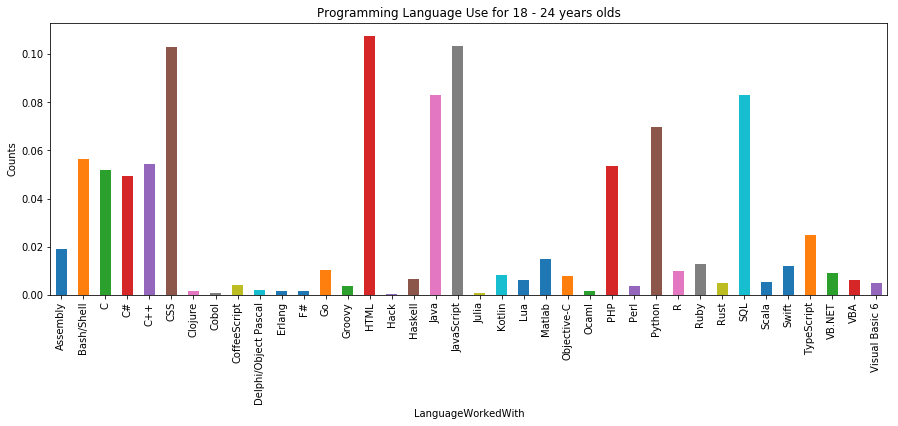

In [84]:
groupby_scaled.iloc[0, :].plot(kind = 'bar', 
                          title = 'Programming Language Use for 18 - 24 years olds', 
                          figsize=(15,5))
plt.ylabel('Counts')
plt.show();

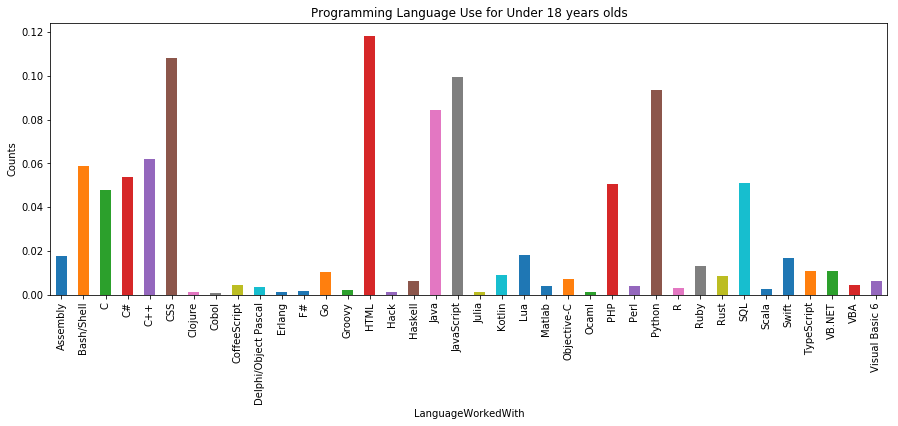

In [85]:
plt.figure(figsize=(20,20))
groupby_scaled.iloc[-1, :].plot(kind = 'bar', 
                          title = 'Programming Language Use for Under 18 years olds', 
                          figsize=(15,5))
plt.ylabel('Counts')
plt.show();

Leading programming languages in this age group : HTML, JavaScript, CSS, SQL; followed by Java, Python and PHP.As we can see HTML, JavaScript and CSS go hand in hand as anyone working as web developer should have skills related to those languages.

Text(0,0.5,'Counts')

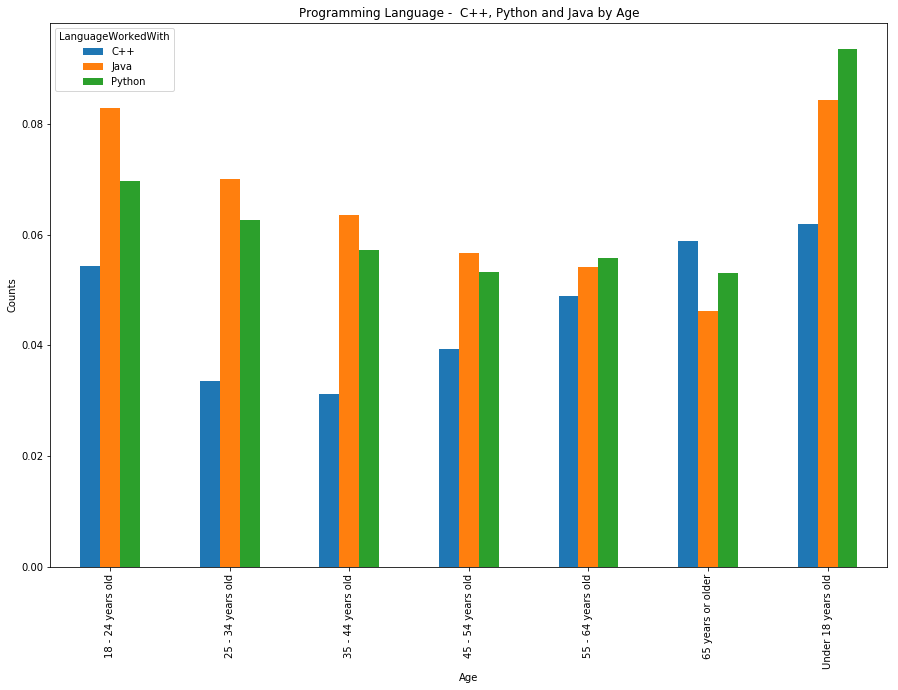

In [86]:
groupby_scaled.iloc[:, [4, 17,27]].plot(kind = 'bar', 
                          title = 'Programming Language -  C++, Python and Java by Age', 
                          figsize=(15,10))
plt.ylabel('Counts')

Looking at the three popular programming languages in the above plot, we can see that Python is leading in the under 18 years old age range. We can see a trend in Python users growing steadily.

**3.What programming language do developers who earn top 5 average Salaries use?**

**3.1 Data preparation**

In [42]:
df_lang_sal = pd.concat([survey_df.Respondent, survey_df.Salary, survey_df.LanguageWorkedWith.str.split(';')], axis=1).dropna()

In [43]:
df_stacked_sal = pd.DataFrame({'Respondent':np.repeat(df_lang_sal.Respondent.values, 
                                                    df_lang_sal.LanguageWorkedWith.str.len()),
                             'Salary':np.repeat(df_lang_sal.Salary.values, 
                                                    df_lang_sal.LanguageWorkedWith.str.len()),
                        'LanguageWorkedWith':np.concatenate(df_lang_sal.LanguageWorkedWith.values)
                            })
df_stacked_sal.head()

,Respondent,Salary,LanguageWorkedWith
0,3,51000,JavaScript
1,3,51000,Python
2,3,51000,Bash/Shell
3,7,260000,C
4,7,260000,C++


In [44]:
df_stacked_sal['Salary'] = df_stacked_sal['Salary'].replace({'\,':''}, regex=True).astype(float)

In [45]:
#removing those with unsually high salary to make this analysis more realistic
MAX_LIM = df_stacked_sal.loc[:,'Salary'].quantile(0.95)
df_stacked_sal['Salary'] = df_stacked_sal.loc[df_stacked_sal['Salary'] < MAX_LIM, 'Salary']
#remove those with zero Salary
df_stacked_sal = df_stacked_sal[df_stacked_sal.Salary > 0]

In [50]:
groupby_lang_sal  = df_stacked_sal.groupby(['LanguageWorkedWith'])['Salary'].aggregate(np.mean)
groupby_lang_sal.head()

LanguageWorkedWith
Assembly      64591.041622
Bash/Shell    72741.174473
C             69320.985393
C#            68323.917428
C++           68577.585677
Name: Salary, dtype: float64

**3.2 Answer to our third business question**

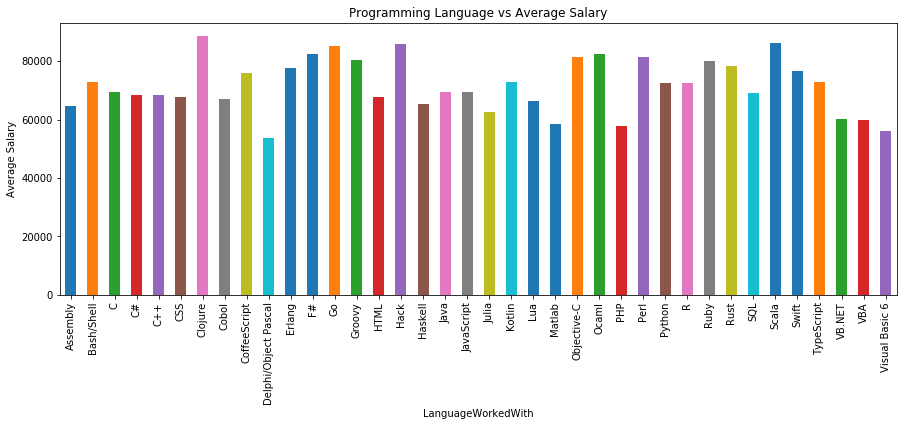

In [226]:
groupby_lang_sal.plot(kind = 'bar', 
                          title = 'Programming Language vs Average Salary', 
                          figsize=(15,5))
plt.ylabel('Average Salary')
plt.show();

### Results Evaluation
**1. Which Programming Languages are the most Popular in the USA?**

The above graph shows the top programming languages developers worked with are C, Java, JavaScript, HTML and CSS. Actual numbers show C and Java are pretty close. Not surprisingly, users of HTML and JavaScipt are very close since there is a high chance to use JavaScript for developering working with HTML and CSS.

**2. Which programming language is the most popular among young developers?**

Leading programming languages in this age group : HTML, JavaScript, CSS, SQL; followed by Java, Python and PHP.As we can see HTML, JavaScript and CSS go hand in hand as anyone working as web developer should have skills related to those languages.

**3. What programming language do developers who earn top 5 average Salaries use?**

We have found out that Clojure, Go, Hack, Objective-C, Ocaml, Scala are the top of the list interms of average Salary.
